# Kal Academy- Assignment-5
   ##### Tezera Y. Chernet(2019)

## Objective: To visualize the Breast Cancer Dataset

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from azureml import Workspace
import seaborn as sns

In [70]:
ws=Workspace()
cancer_ds=ws.datasets['Breast-cancer-data.csv']
cancer_df=cancer_ds.to_dataframe()
cancer_df1=cancer_ds.to_dataframe()

In [71]:
cancer_df.dtypes
cancer_df.columns
#cancer_df.describe
#cancer_df.shape

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [72]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [73]:
cancer_df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [74]:
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [75]:
def diag_colum_transform(x):
    if x=='M':
        return 1
    if x=='B':
        return 0
    
cancer_df['diagnosis']=cancer_df['diagnosis'].apply(diag_colum_transform)    

In [76]:
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
#drope rows with null values
cancer_df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)

# Pair-Wise Scatter Plot

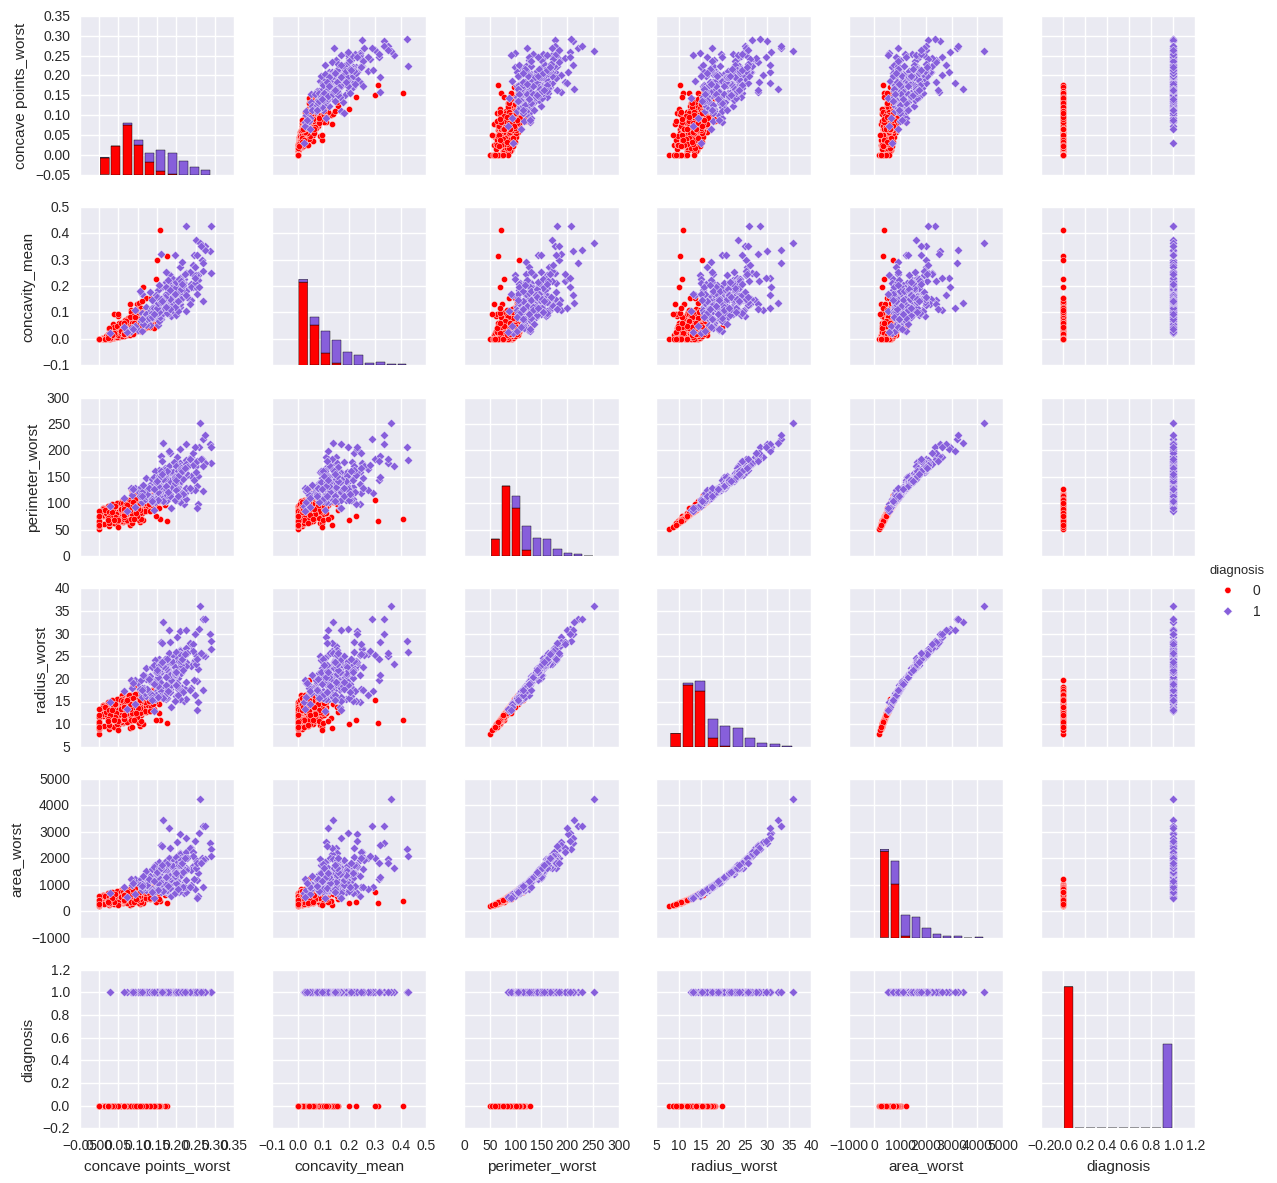

In [78]:
#Scatter plot of selected columns to visualize the correlation
import seaborn as sns
cols = ['concave points_worst', 'concavity_mean', 
        'perimeter_worst', 'radius_worst', 
        'area_worst', 'diagnosis']
df_new=cancer_df[cols]
sns.pairplot(df_new,
             size=2,
             x_vars = cols,
             y_vars = cols,
             hue = 'diagnosis', 
             palette = ('Red', '#875FDB'), 
             markers=["o", "D"])
plt.show()


# Histogram

Beneign 357 Malignant 212


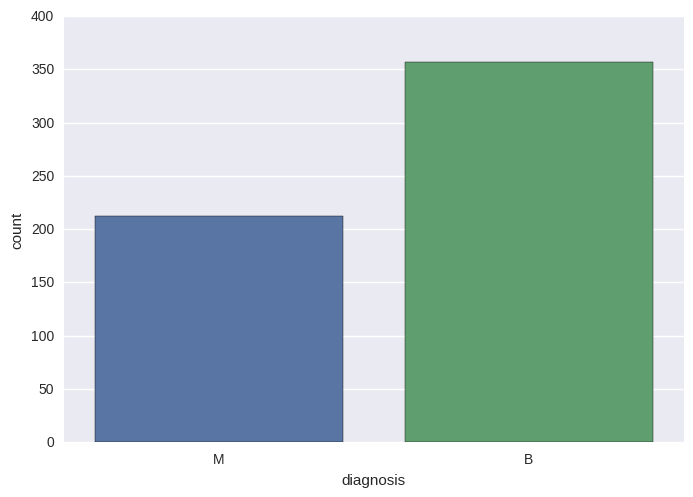

In [79]:
# To visualize the totla number of Beneign and Malignant cancer
B,M = cancer_df1['diagnosis'].value_counts()
print("Beneign",B,'Malignant',M)
ax = sns.countplot(cancer_df1['diagnosis'],label='Count')
plt.show()

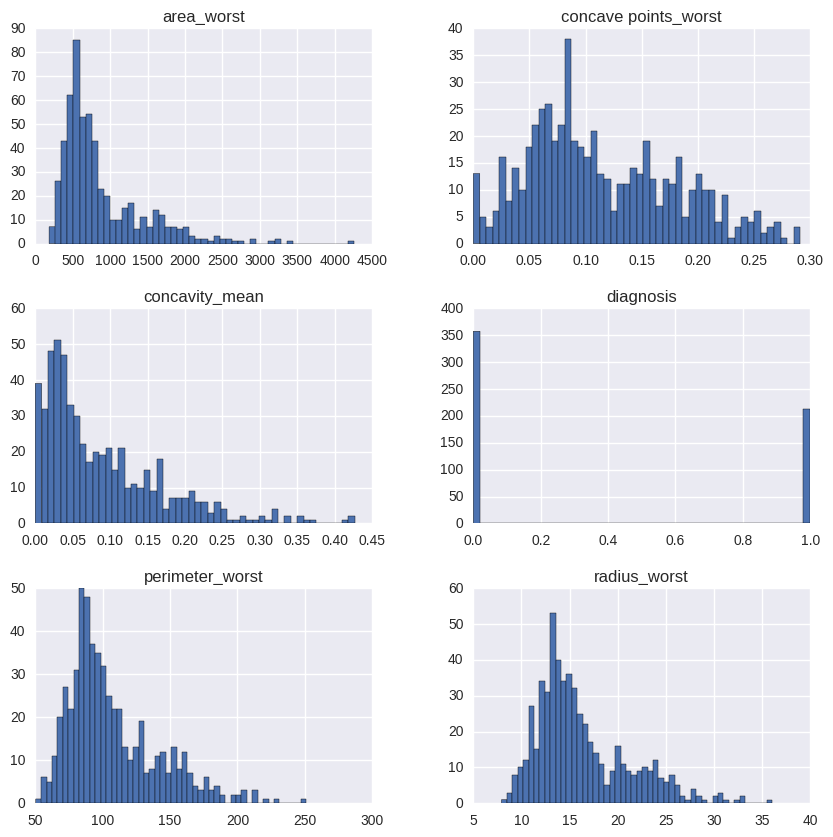

In [80]:
#Hist plot of selected columns to visualize the distribution
selected_cols2= ['concave points_worst', 'concavity_mean', 
                 'perimeter_worst','radius_worst', 
                 'area_worst', 'diagnosis']

df_new2=cancer_df[selected_cols2]  
df_new2.hist(bins=50, figsize=(10,10))
plt.show()

# Scatter Plot

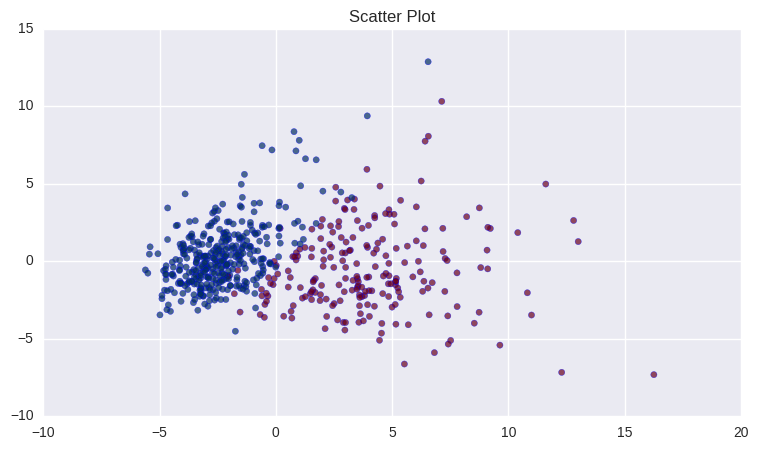

In [85]:
# Principal component analysis and it's Scatter Plot
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
selected_cols3=['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

df_new3=cancer_df[selected_cols3] 

X=df_new3.iloc[:,:].values
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

pca = PCA(n_components=.95) #Binary Classifier
pca = pca.fit_transform(X)
plt.figure(figsize = (9,5))
plt.scatter(pca[:,0],pca[:,1], c = df_new3['diagnosis'], cmap = 'RdBu_r', edgecolor = 'blue', alpha=0.7)
#plt.colorbar()
plt.title('Scatter Plot')
plt.show()

# Box Plot

In [86]:
# From helperFunction script 
def normalize_df(frame):
   
    breast_cancerNorm = pd.DataFrame()
    for item in frame:
        if item in frame.select_dtypes(include=[np.float]):
            breast_cancerNorm[item] = ((frame[item] - frame[item].min()) / 
            (frame[item].max() - frame[item].min()))
        else: 
            breast_cancerNorm[item] = frame[item]
    return breast_cancerNorm

breast_cancerNorm = normalize_df(df_new)
breast_cancerNorm.describe()


,concave points_worst,concavity_mean,perimeter_worst,radius_worst,area_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.393836,0.208058,0.283138,0.296663,0.170906,0.372583
std,0.225884,0.186785,0.167352,0.171940,0.139932,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223127,0.069260,0.167837,0.180719,0.081130,0.000000
50%,0.343402,0.144189,0.235320,0.250445,0.123206,0.000000
75%,0.554639,0.306232,0.373475,0.386339,0.220901,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


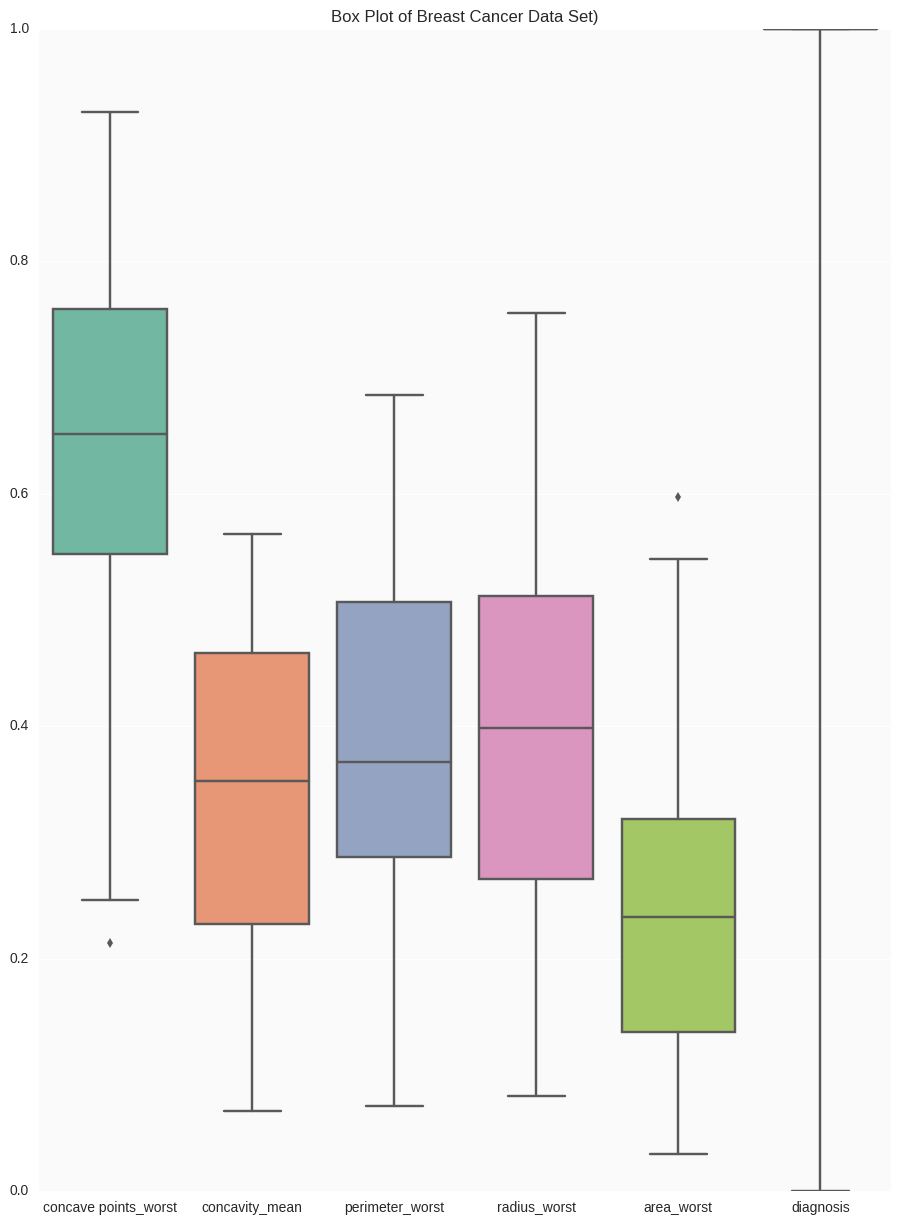

In [87]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#fafafa')
plt.title("Box Plot of Breast Cancer Data Set)")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breast_cancerNorm[1:29], 
  orient = 'v', 
  palette = 'Set2')
plt.show()